In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random
import d2lzh

In [17]:
#2个特征数
num_inputs = 2
#1000个样本
num_examples = 1000
#真实权重
true_w = [2, -3.4]
#偏差
true_b = 4.2
#特征式
features = nd.random.normal(scale = 1, shape = (num_examples, num_inputs))
#标签
labels = features[:, 0] * true_w[0] + features[:, 1] * true_w[1] + true_b
labels += nd.random.normal(scale = 0.01, shape = labels.shape)
features[0], labels[0]

(
 [ 1.8009994 -0.5549816]
 <NDArray 2 @cpu(0)>,
 
 [9.691065]
 <NDArray 1 @cpu(0)>)

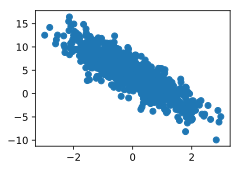

In [18]:
d2lzh.set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy())

In [19]:
batch_size = 10

for X, y in d2lzh.data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.01372293  0.73972213]
 [ 1.0376986  -0.5029123 ]
 [-0.10734066  0.5089881 ]
 [-0.05150942 -0.52475643]
 [ 0.23105703  1.4446224 ]
 [ 0.1379674   0.559384  ]
 [-0.07034879 -1.4576051 ]
 [ 0.08008751  0.08942367]
 [-3.1017628  -1.4646413 ]
 [-1.8111521   0.42369357]]
<NDArray 10x2 @cpu(0)> 
[ 1.7054566   7.972387    2.270773    5.865306   -0.26170424  2.5876868
  9.004725    4.0544767   2.9591012  -0.87805116]
<NDArray 10 @cpu(0)>


In [20]:
w = nd.random.normal(scale = 0.01, shape = (num_inputs, 1))
b = nd.zeros(shape = (1, ))

In [21]:
w.attach_grad()
b.attach_grad()

In [22]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [23]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [24]:
'''
此为小批量随机梯度下降算法
参数说明
param::迭代参数
lr::learning rate 学习率
batch_size::样本个数
'''
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [32]:
#learning rate
lr = 0.001
#迭代周期
num_epochs = 3
#回归算法
net = linreg
#损失函数
loss = squared_loss

for epoch in range(num_epochs):
    #一共迭代num_epochs个周期
    #每一个周期中，会使用训练数据集中的所有样本一次
    #X和y分别是小批量样本的特征和标签
    for X, y in d2lzh.data_iter(batch_size, features, labels):
        with autograd.record():
            #l是有关小批量X和y的损失
            l = loss(net(X, w, b), y)
        #小批量的损失对模型参数求梯度
        l.backward()
        #使用小批量随机梯度下降迭代模型参数
        sgd([w, b], lr, batch_size)
    #样本整体损失
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' %(epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050


In [33]:
true_w, w

([2, -3.4],
 
 [[ 1.999935]
  [-3.399888]]
 <NDArray 2x1 @cpu(0)>)

In [34]:
true_b, b

(4.2,
 
 [4.2000957]
 <NDArray 1 @cpu(0)>)